# Pymaceuticals Inc.
---

### Analysis

This document provides analysis of a Pymaceuticals study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

- At surface value, Capomulin appears to be a somewhat promising option for SCC tumor treatment. It appears to be almost as effective as Ramicane. 

- Capomulin has a smaller IQR when compared to Ramicane, a similarly effective drug. It would be worth digging deeper into the data to determine if Capomulin is particualrly effective for certain demographics. 

- Capomulin seems to be promising enough to warrant further investigation. It would be important to increase the sample size of the survey to replicate the results.


 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.

number_of_mice = merged_data["Mouse ID"].nunique()

number_of_mice



249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice


array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_merged_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]



In [28]:
# Checking the number of mice in the clean DataFrame.

print(cleaned_merged_data["Mouse ID"].nunique())


248


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by "Drug Regimen"
grouped = cleaned_merged_data.groupby("Drug Regimen")

# Calculate mean, median, variance, standard deviation, and SEM of "Tumor Volume"
agg_dict = {
    "Tumor Volume (mm3)": [np.mean, np.median, np.var, np.std, lambda x: np.std(x) / np.sqrt(len(x))]
}

# Apply aggregation to the grouped data
result = grouped.agg(agg_dict)

# Flatten the resulting MultiIndex DataFrame
result.columns = [f"{col[0]}_{col[1].upper()}" for col in result.columns]
result = result.reset_index()
result = result.rename(columns={"Tumor Volume (mm3)_<LAMBDA_0>": "Tumor Volume (mm3)_SEM"})
result = result.set_index("Drug Regimen")


result




,Tumor Volume (mm3)_MEAN,Tumor Volume (mm3)_MEDIAN,Tumor Volume (mm3)_VAR,Tumor Volume (mm3)_STD,Tumor Volume (mm3)_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


## Bar and Pie Charts

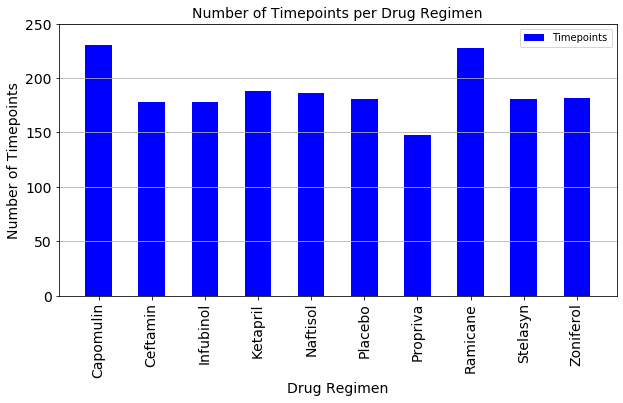

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = cleaned_merged_data.groupby("Drug Regimen").count()["Timepoint"].plot.bar(figsize=(10,5), color="b", fontsize=14)

bar_plot.set_xlabel("Drug Regimen", fontsize=14)
bar_plot.set_ylabel("Number of Timepoints", fontsize=14)
bar_plot.set_title("Number of Timepoints per Drug Regimen", fontsize=14)
bar_plot.set_ylim(0, 250)
bar_plot.set_xlim(-0.75, len(cleaned_merged_data["Drug Regimen"].unique())-0.25)
bar_plot.grid(axis="y")
bar_plot.legend(["Timepoints"], loc="upper right")



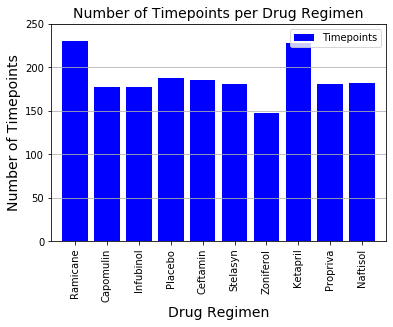

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_bar = plt.bar(cleaned_merged_data["Drug Regimen"].unique(), cleaned_merged_data.groupby("Drug Regimen").count()["Timepoint"], color="b", align="center")
pyplot_bar = plt.xticks(rotation=90)
pyplot_bar = plt.xlabel("Drug Regimen", fontsize=14)
pyplot_bar = plt.ylabel("Number of Timepoints", fontsize=14)
pyplot_bar = plt.title("Number of Timepoints per Drug Regimen", fontsize=14)
pyplot_bar = plt.ylim(0, 250)
pyplot_bar = plt.xlim(-0.75, len(cleaned_merged_data["Drug Regimen"].unique())-0.25)
pyplot_bar = plt.grid(axis="y")
pyplot_bar = plt.legend(["Timepoints"], loc="upper right")
pyplot_bar = plt.show()



Text(0.5, 1.0, 'Participant Sex')

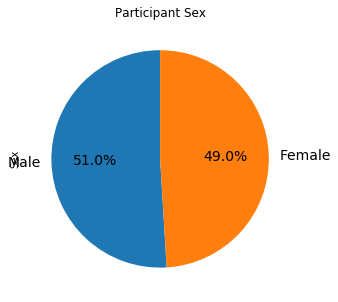

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#label each component of the pie chart

pie_plot_pandas = cleaned_merged_data["Sex"].value_counts().plot.pie(figsize=(10,5), autopct="%1.1f%%", startangle=90, fontsize=14)
pie_plot_pandas.set_title("Participant Sex")




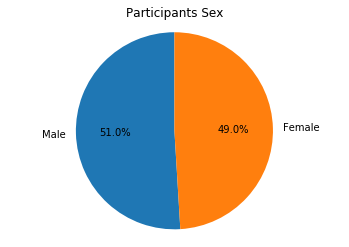

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = cleaned_merged_data['Sex'].value_counts()

plt.pie(counts, labels=counts.index.values, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Participants Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_dataframe = cleaned_merged_data[cleaned_merged_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

treatment_dataframe
# Start by getting the last (greatest) timepoint for each mouse

treatment_dataframe_max = treatment_dataframe.groupby("Mouse ID").max()["Timepoint"]

treatment_dataframe_max = treatment_dataframe_max.reset_index()

treatment_dataframe_max
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_treatment_dataframe = pd.merge(treatment_dataframe_max, cleaned_merged_data, on=["Mouse ID", "Timepoint"], how="left")

merged_treatment_dataframe


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

for treatments in merged_treatment_dataframe["Drug Regimen"].unique():
    treatment_list.append(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for treatment in treatment_list:
    
    treatment_df = merged_treatment_dataframe[merged_treatment_dataframe["Drug Regimen"] == treatment]
    # Retrieve the tumor volume data

    tumor_volume = treatment_df["Tumor Volume (mm3)"]
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers by using the upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{treatment}: IQR: {iqr}, Outliers: {outliers.tolist()}")
    
    tumor_volumes.append(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds



Infubinol: IQR: 11.477135160000003, Outliers: [36.321345799999996]
Ceftamin: IQR: 15.577752179999997, Outliers: []
Ramicane: IQR: 9.098536719999998, Outliers: []
Capomulin: IQR: 7.781863460000004, Outliers: []


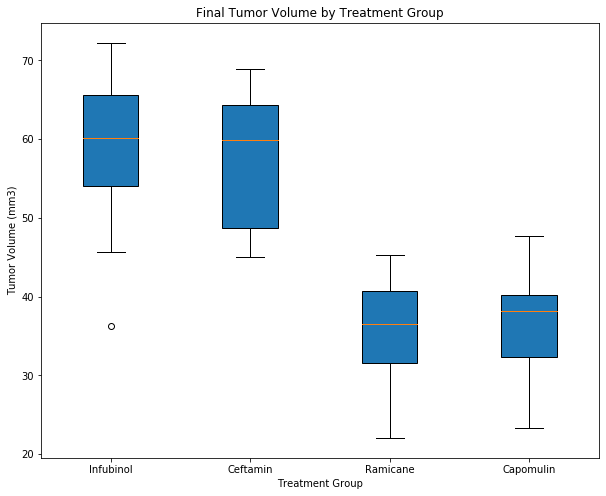

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Final Tumor Volume by Treatment Group")
ax.set_xlabel("Treatment Group")
ax.set_ylabel("Tumor Volume (mm3)")
plt.boxplot(tumor_volumes, labels=treatment_list, widths=0.4, patch_artist=True,vert=True)
plt.show()




## Line and Scatter Plots

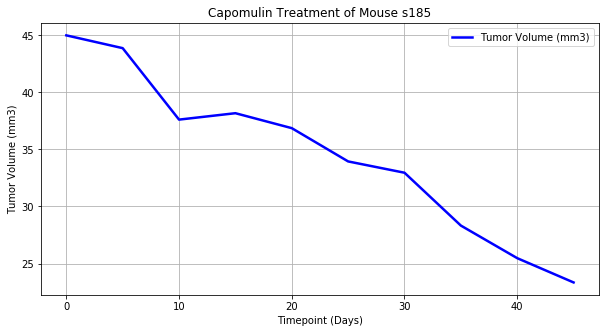

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_plot = cleaned_merged_data.loc[cleaned_merged_data["Mouse ID"] == "s185"]
capomulin_plot = capomulin_plot[["Timepoint", "Tumor Volume (mm3)"]]
capomulin_plot = capomulin_plot.set_index("Timepoint")
capomulin_plot = capomulin_plot.plot(figsize=(10,5), linewidth=2.5, color="blue")
capomulin_plot.set_xlabel("Timepoint (Days)")
capomulin_plot.set_ylabel("Tumor Volume (mm3)")
capomulin_plot.set_title("Capomulin Treatment of Mouse s185")
capomulin_plot.legend(["Tumor Volume (mm3)"])
capomulin_plot.grid()
capomulin_plot



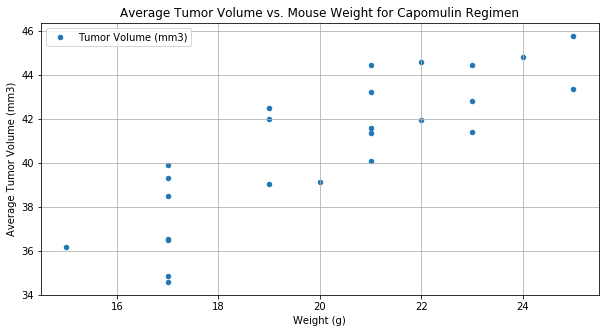

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = cleaned_merged_data.loc[cleaned_merged_data["Drug Regimen"] == "Capomulin"]
capomulin_scatter = capomulin_scatter.groupby("Mouse ID").mean()
capomulin_scatter = capomulin_scatter.reset_index()
capomulin_scatter = capomulin_scatter[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter = capomulin_scatter.set_index("Mouse ID")
capomulin_scatter = capomulin_scatter.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(10,5), grid=True, title="Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
capomulin_scatter.set_xlabel("Weight (g)")
capomulin_scatter.set_ylabel("Average Tumor Volume (mm3)")
capomulin_scatter.legend(["Tumor Volume (mm3)"])
capomulin_scatter



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


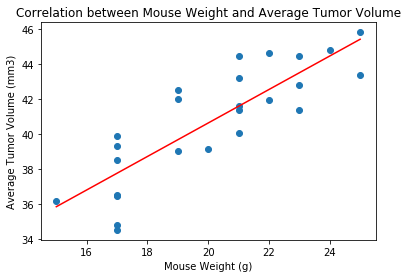

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Filter the data for the Capomulin treatment
capomulin_data = cleaned_merged_data[cleaned_merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean()

# Extract the mouse weight and average tumor volume columns
mouse_weight = avg_tumor_volume['Weight (g)']
avg_tumor = avg_tumor_volume['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation, _ = st.pearsonr(mouse_weight, avg_tumor)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Fit a linear regression model
slope, intercept, _, _, _ = st.linregress(mouse_weight, avg_tumor)

# Plot the scatter plot of mouse weight and average tumor volume
plt.scatter(mouse_weight, avg_tumor)

# Plot the regression line on top of the scatter plot
x = [min(mouse_weight), max(mouse_weight)]
y = [slope * xx + intercept for xx in x]
plt.plot(x, y, 'r')

# Add labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation between Mouse Weight and Average Tumor Volume')

# Show the plot
plt.show()
